In [1]:
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)




       Kod Kapanış (TL)   F/K FD/FAVÖK FD/Satışlar  PD/DD Son Dönem Risk Analizi
0   ISGYO         1544   4.7      A/D         A/D    0.5   12/2023     Çok Ucuz
1   SKBNK          456   2.7      A/D         A/D    0.7   12/2023     Çok Ucuz
2   ZOREN          575   2.6      106          25    0.7   12/2023     Çok Ucuz
3   EREGL         4138  35.9      120          13    0.8   12/2023     Çok Ucuz
4   ALBRK          464   2.8      A/D         A/D    0.8   12/2023     Çok Ucuz
5   HALKB         1505   6.1      A/D         A/D    0.8   12/2023     Çok Ucuz
6   SAHOL         8950  12.2      A/D         A/D    0.9   12/2023     Çok Ucuz
7   AKFGY          223   2.1      A/D         A/D    0.9    9/2023     Çok Ucuz
8   VAKBN         1664   4.8      A/D         A/D    0.9   12/2023     Çok Ucuz
9   THYAO        30725   2.6       58          13    0.9   12/2023     Çok Ucuz
10  CANTE         1793  37.6      106          29    1.0   12/2023     Çok Ucuz
11  ENKAI         3660  12.9       89

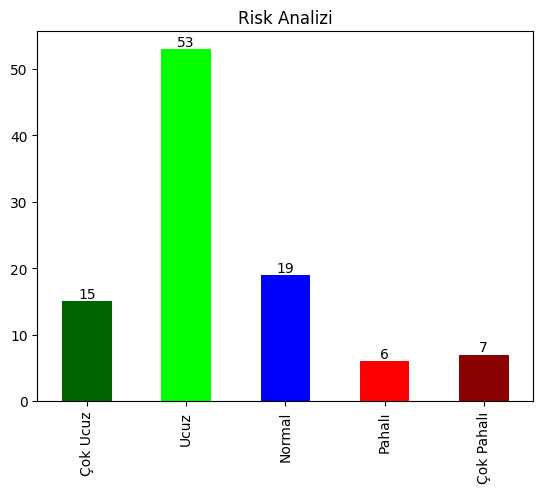

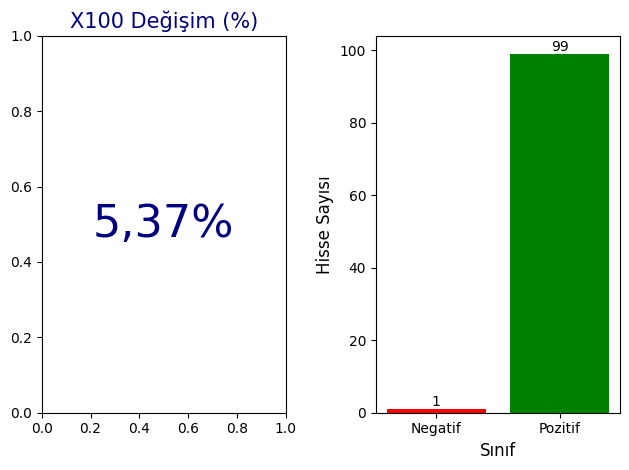

C:\Users\bogaco\AppData\Local\Temp\ipykernel_24356\2581355816.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_neg["Menkul"] = most_neg["Menkul"].reset_index(drop=True)
C:\Users\bogaco\AppData\Local\Temp\ipykernel_24356\2581355816.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_neg["%"] = most_neg["%"].reset_index(drop=True)


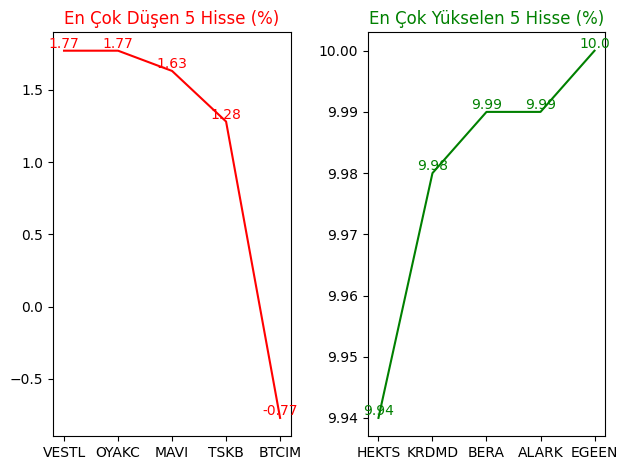



    Menkul  Portföy Yüzdesi   Fiyat     %     Zaman    Kod Kapanış (TL)   F/K FD/FAVÖK FD/Satışlar  PD/DD Son Dönem Risk Analizi    Fark
0   ENKAI             0.10   36.60  4.81  18:09:59  ENKAI         3660  12.9       89          17    1.0   12/2023     Çok Ucuz  0.4810
1   ASELS             0.06   58.45  8.54  18:09:58  ASELS         5845  36.6      175          38    3.1   12/2023         Ucuz  0.5124
2   SAHOL             0.07   89.50  4.07  18:09:59  SAHOL         8950  12.2      A/D         A/D    0.9   12/2023     Çok Ucuz  0.2849
3   KCHOL             0.07  222.60  6.41  18:09:59  KCHOL        22260   7.8      A/D         A/D    1.4   12/2023         Ucuz  0.4487
4    SISE             0.07   48.72  4.91  18:09:40   SISE         4872   8.7       92          12    1.0   12/2023     Çok Ucuz  0.3437
5   TUPRS             0.07  179.70  5.77  18:09:59  TUPRS        17970   6.5       29          04    1.7   12/2023         Ucuz  0.4039
6   PETKM             0.07   19.70  4.79  18:

In [2]:
def html_read(url):
    table = pd.read_html(url)
    return table

def run_code():
   
    f_k = html_read("https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx?endeks=01#page-5")
    fiyat_kazanc = f_k[6]
    fiyat_kazanc["PD/DD"] = pd.to_numeric(fiyat_kazanc["PD/DD"], errors="coerce") / 10
    fiyat_kazanc["F/K"] = pd.to_numeric(fiyat_kazanc["F/K"], errors="coerce") / 10
    fiyat_kazanc["Risk Analizi"] = ['Çok Pahalı' if x > 20 else "Pahalı" if x > 12 else "Normal" if x > 4 else "Ucuz" if x > 1 else 'Çok Ucuz' for x in fiyat_kazanc['PD/DD']]
    fiyat_kazanc = fiyat_kazanc.sort_values("PD/DD")
    fiyat_kazanc = fiyat_kazanc.reset_index(drop=True)


 
    
    tables=html_read("https://uzmanpara.milliyet.com.tr/canli-borsa/")
    combined_table=pd.concat([tables[1],tables[2],tables[3]])

    combined_table['%'] = combined_table['%'].astype("float")/100
    combined_table=combined_table.sort_values("%",ascending=False)
    combined_table=combined_table.drop("Unnamed: 1",axis=1)
    combined_table=combined_table.reset_index(drop=True)
    combined_table['Fiyat'] =pd.to_numeric(combined_table["Fiyat"],errors="coerce")
    combined_table['Fiyat'] = combined_table['Fiyat']/100


    print("\n\n",fiyat_kazanc[fiyat_kazanc['Risk Analizi']=="Çok Ucuz"],"\n")
    
    print("\n\n",combined_table.head(10))
   
   
    positives=combined_table[combined_table["%"]>0]
    negatives=combined_table[combined_table["%"]<0]
    risk_sayisi = fiyat_kazanc['Risk Analizi'].value_counts()
    risk_sayisi = risk_sayisi.reindex(['Çok Ucuz', 'Ucuz',"Normal","Pahalı", 'Çok Pahalı'])
    grafik=risk_sayisi.plot(kind="bar",color=["#006400","#00FF00","Blue","#FF0000","#8B0000"])
    plt.title("Risk Analizi")
    for i, v in enumerate(risk_sayisi):
        grafik.text(i, v, str(v), ha='center', va='bottom')
    
    plt.show()

    plt.subplot(1, 2, 1)
    plt.text(0.5, 0.5, str(tables[0][1][0].strip(": ")), fontsize=32, ha='center', va='center',color="navy")
    plt.title("X100 Değişim (%)", color='navy',fontsize=15)


    data = {'Sınıf': ['Negatif', 'Pozitif'],"Hisse Sayısı":[negatives.count()[0],positives.count()[0]]}

    Hisse_Tablo=pd.DataFrame(data)
    plt.subplot(1, 2, 2)
    plt.bar(Hisse_Tablo["Sınıf"],Hisse_Tablo["Hisse Sayısı"],color=['red', 'green'])
    plt.xlabel('Sınıf',fontsize=12)
    plt.ylabel('Hisse Sayısı',fontsize=12)
    for i in range(len(Hisse_Tablo["Sınıf"])):
        plt.annotate(str(Hisse_Tablo["Hisse Sayısı"][i]), xy=(Hisse_Tablo["Sınıf"][i], Hisse_Tablo["Hisse Sayısı"][i]), xytext=(Hisse_Tablo["Sınıf"][i], Hisse_Tablo["Hisse Sayısı"][i]),
                    ha='center', va='bottom',color="black",fontsize=10)
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show()

    most_neg=combined_table.tail(5)
    most_neg.reset_index(drop=True, inplace=True)
    most_neg["Menkul"] = most_neg["Menkul"].reset_index(drop=True)
    most_neg["%"] = most_neg["%"].reset_index(drop=True)
    plt.subplot(1, 2, 1)
    plt.title("En Çok Düşen 5 Hisse (%)", color='red',fontsize=12)
    plt.plot(most_neg["Menkul"],most_neg["%"],color="red")
    for i in range(len(most_neg["Menkul"])):
        plt.annotate(str(most_neg["%"][i]), xy=(most_neg["Menkul"][i], most_neg["%"][i]), xytext=(most_neg["Menkul"][i], most_neg["%"][i]),
                    ha='center', va='bottom',color="red")
    
    most_pos=combined_table.head(5).sort_values("%")
    plt.subplot(1, 2, 2)
    plt.title("En Çok Yükselen 5 Hisse (%)", color='green',fontsize=12)
    plt.plot(most_pos["Menkul"],most_pos["%"],color="green")
    for i in range(len(most_pos["Menkul"])):
        plt.annotate(str(most_pos["%"][i]), xy=(most_pos["Menkul"][i], most_pos["%"][i]), xytext=(most_pos["Menkul"][i], most_pos["%"][i]),
                    ha='center', va='bottom',color="green")

    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show()

    
    portfoy=pd.DataFrame({"Menkul":["ENKAI","ASELS","SAHOL","KCHOL","SISE","TUPRS","PETKM","TOASO","YKBNK","KRDMD","VESBE","TAVHL","THYAO","BIMAS"],"Portföy Yüzdesi":[0.1,0.06,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07]})
    portfoy_m=pd.merge(portfoy,combined_table,how="left",on="Menkul")
    portfoy_m=pd.merge(portfoy_m,fiyat_kazanc,how="left",left_on="Menkul",right_on="Kod")
    portfoy_m.drop("Kod",axis=1)
    portfoy_m.sort_values("%")
    portfoy_m.reset_index(drop=True)
    
    portfoy_m["Fark"]=portfoy_m["Portföy Yüzdesi"]*portfoy_m["%"]
    toplam=portfoy_m["Fark"].sum()
    print("\n\n",portfoy_m)
    print("\n\nPortföyün Günlük Değişimi: %",toplam)

   
    print()
   

while True:
  
    run_code()
    print("Kodun çalıştırıldığı tarih:",datetime.now(),"\n\n\n")
    time.sleep(60)  
    clear_output(wait=True)
